# 实验四：朴素贝叶斯
- 姓名：吴静
- 学号：2113285
- 班级：信息安全二班

## 实验要求

### 基本要求
- 采用分层采样的方式将数据集划分为训练集和测试集。 
- 给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。

### 中级要求
使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。

### 高级要求
在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。

### 扩展要求
浅谈ROC曲线和AUC值作为分类评价的合理性。

### 导入需要的包

In [2206]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve,auc
from matplotlib import pyplot as plt
from scipy import interp

定义一些全局变量

In [2207]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]

num_data=[0,59,71,48]
train_num=[0]*3

由于从数据集中取得的变量值为`string`类型，于是要将变量值转化成`float`或者`int`类型变量

In [2208]:
def to_float(data):
    for i in data:
        for j in range(len(i)):
            i[j]=float(i[j])

In [2209]:
def to_int(data):
    for i in range(len(data)):
        data[i]=int(data[i])

### 导入数据集

In [2210]:
def get_dataset(name):
    f=open(name)
    dataset=f.readlines()
    X=[]
    y=[]
    for i in range(len(dataset)):
        temp=dataset[i].split(',')
        temp_X=temp[1:]
        temp_y=temp[0]
        X.append(temp_X)
        y.append(temp_y)

    to_float(X)
    to_int(y)

    return X,y

`X`是数据，`y`是对应的标签

In [2211]:
X,y=get_dataset("wine.data")
print(X)

[[14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0], [13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0], [13.16, 2.36, 2.67, 18.6, 101.0, 2.8, 3.24, 0.3, 2.81, 5.68, 1.03, 3.17, 1185.0], [14.37, 1.95, 2.5, 16.8, 113.0, 3.85, 3.49, 0.24, 2.18, 7.8, 0.86, 3.45, 1480.0], [13.24, 2.59, 2.87, 21.0, 118.0, 2.8, 2.69, 0.39, 1.82, 4.32, 1.04, 2.93, 735.0], [14.2, 1.76, 2.45, 15.2, 112.0, 3.27, 3.39, 0.34, 1.97, 6.75, 1.05, 2.85, 1450.0], [14.39, 1.87, 2.45, 14.6, 96.0, 2.5, 2.52, 0.3, 1.98, 5.25, 1.02, 3.58, 1290.0], [14.06, 2.15, 2.61, 17.6, 121.0, 2.6, 2.51, 0.31, 1.25, 5.05, 1.06, 3.58, 1295.0], [14.83, 1.64, 2.17, 14.0, 97.0, 2.8, 2.98, 0.29, 1.98, 5.2, 1.08, 2.85, 1045.0], [13.86, 1.35, 2.27, 16.0, 98.0, 2.98, 3.15, 0.22, 1.85, 7.22, 1.01, 3.55, 1045.0], [14.1, 2.16, 2.3, 18.0, 105.0, 2.95, 3.32, 0.22, 2.38, 5.75, 1.25, 3.17, 1510.0], [14.12, 1.48, 2.32, 16.8, 95.0, 2.2, 2.43, 0.26, 1.57, 5.0, 1.17, 2.82, 1280.0], [13.75, 1.73, 

### 划分数据集为训练集和测试集

- 本次实验按照7：3的比例抽样划分训练集和测试集
- 注意此时数据集中有三个类别，我将这三个类别的数据分别提取出来，对每一个类别的数据采用`train_test_split()`函数划分，最后再将所有划分出的测试集和训练集合并

In [2212]:
def get_data():
    global x_train
    global x_test
    global y_train
    global y_test

    X,y=get_dataset("wine.data")
    for i in range(3):
        #对于每一个类别按照7:3的比例层抽样划分训练集和测试集
        if i==0:
            X_temp=X[0:59]
            y_temp=y[0:59]
        elif i==1:
            X_temp=X[59:59+71]
            y_temp=y[59:59+71]
        else:
            X_temp=X[59+71:]
            y_temp=y[59+71:]

        x_train_temp,x_test_temp,y_train_temp,y_test_temp=train_test_split(X_temp,y_temp,test_size=0.3)
        train_num[i]=len(x_train_temp)

        to_int(train_num)

        for j in range(len(x_train_temp)):
            x_train.append(x_train_temp[j])
        for j in range(len(x_test_temp)):
            x_test.append(x_test_temp[j])
        for j in range(len(y_train_temp)):
            y_train.append(y_train_temp[j])
        for j in range(len(y_test_temp)):
            y_test.append(y_test_temp[j])


In [2213]:
get_data()

In [2214]:
print(x_test)
print(y_test)

[[13.74, 1.67, 2.25, 16.4, 118.0, 2.6, 2.9, 0.21, 1.62, 5.85, 0.92, 3.2, 1060.0], [13.39, 1.77, 2.62, 16.1, 93.0, 2.85, 2.94, 0.34, 1.45, 4.8, 0.92, 3.22, 1195.0], [13.77, 1.9, 2.68, 17.1, 115.0, 3.0, 2.79, 0.39, 1.68, 6.3, 1.13, 2.93, 1375.0], [13.86, 1.35, 2.27, 16.0, 98.0, 2.98, 3.15, 0.22, 1.85, 7.22, 1.01, 3.55, 1045.0], [13.48, 1.81, 2.41, 20.5, 100.0, 2.7, 2.98, 0.26, 1.86, 5.1, 1.04, 3.47, 920.0], [13.24, 2.59, 2.87, 21.0, 118.0, 2.8, 2.69, 0.39, 1.82, 4.32, 1.04, 2.93, 735.0], [13.83, 1.57, 2.62, 20.0, 115.0, 2.95, 3.4, 0.4, 1.72, 6.6, 1.13, 2.57, 1130.0], [14.38, 1.87, 2.38, 12.0, 102.0, 3.3, 3.64, 0.29, 2.96, 7.5, 1.2, 3.0, 1547.0], [13.05, 1.73, 2.04, 12.4, 92.0, 2.72, 3.27, 0.17, 2.91, 7.2, 1.12, 2.91, 1150.0], [13.64, 3.1, 2.56, 15.2, 116.0, 2.7, 3.03, 0.17, 1.66, 5.1, 0.96, 3.36, 845.0], [12.93, 3.8, 2.65, 18.6, 102.0, 2.41, 2.41, 0.25, 1.98, 4.5, 1.03, 3.52, 770.0], [14.21, 4.04, 2.44, 18.9, 111.0, 2.85, 2.65, 0.3, 1.25, 5.24, 0.87, 3.33, 1080.0], [13.24, 3.98, 2.29, 17

### 计算概率密度函数

In [2215]:
p=[59/(59+71+48),71/(59+71+48),48/(59+71+48)]

right_rate=0
predict=[]
score=[]
#score:存储每一个测试数据对应的分类到每一个类别的概率
label=[]
#label：存储每一个测试数据对应的类别

计算先验概率，本题将其假设为符合正态分布，概率密度公式为
$$\frac{1}{\sqrt{2 \pi}\sigma}e^{-\frac{(x-u)^2}{2\sigma^2}}$$


In [2216]:
def Bayes(p,data_test,avg,var2):
    result=p
    #初始化为该类别所占的比例

    for i in range(len(data_test)):
        #对测试数据中的每一个元素进行概率密度的计算

        result*=1/(np.sqrt(2*np.pi*var2[i]))*np.exp(-((data_test[i]-avg[i])**2)/(2*var2[i]))

    return result

极大后验概率决策规则：
$$
c_{MAP} = \arg\max_{c_k \in \mathcal{C}} P(c_k | x) = \arg\max_{c_k \in \mathcal{C}} \frac{P(x | c_k) P(c_k)}{P(x)} = \arg\max_{c_k \in \mathcal{C}} P(x | c_k) P(c_k)
$$


In [2217]:
def get_right():
    global x_train
    global predict
    global right_rate
    global label
    global score
    
    avg=[]
    var2=[]

    x_train=np.array(x_train)

    avg.append(x_train[0:train_num[0]].mean(axis=0))
    var2.append(x_train[0:train_num[0]].var(axis=0))
    avg.append(x_train[train_num[0]:train_num[0]+train_num[1]].mean(axis=0))
    var2.append(x_train[train_num[0]:train_num[0]+train_num[1]].var(axis=0))
    avg.append(x_train[train_num[0]+train_num[1]:].mean(axis=0))
    var2.append(x_train[train_num[0]+train_num[1]:].var(axis=0))
    #算出每一个类别的方差和平均值

    error=0
    #统计总共的出错概率

    for i in range(len(x_test)):
        #对每一个测试集数据进行验证

        temp=[]
        #存储每一个类别对应的概率
        label_temp=[0]*3

        for j in range(3):
            #分别计算每一个的概率，并取出最大值类别索引

            temp.append(Bayes(p[j],x_test[i],avg[j],var2[j]))
            #计算每一个类别对应的先验概率
        
        max=np.argmax(temp)+1
        #取得预测的类型
        label_temp[max-1]=1
        #对相应的标签进行置位

        predict.append(max)
        score.append(temp)
        label.append(label_temp)

        if(max!=y_test[i]):
            error+=1
            #每次分类错误，则错误个数+1

    right_num=len(x_test)-error
    right_rate=right_num/len(x_test)


In [2218]:
get_right()

In [2219]:
print("正确率 right_rate：%.2f%%"%right_rate)

正确率 right_rate：0.91%


这里用了一个格式化说明符`:0.2f`
- `0` 表示不使用任何字符进行填充。
- `.2f` 表示将参数作为浮点数格式化，并保留两位小数。

### 混淆矩阵

混淆矩阵的主要元素包括：

- **真正例（True Positives，TP）**： 表示模型正确地将正类别的样本分类为正类别的数量。

- **真负例（True Negatives，TN）**： 表示模型正确地将负类别的样本分类为负类别的数量。

- **假正例（False Positives，FP）**： 表示模型将负类别的样本错误地分类为正类别的数量。

- **假负例（False Negatives，FN）**： 表示模型将正类别的样本错误地分类为负类别的数量。



In [2220]:
maxtria=[[0,0,0],[0,0,0],[0,0,0]]

In [2221]:
def confuse_maxtria():
    global maxtria

    for i in range(len(predict)):
        maxtria[y_test[i]-1][predict[i]-1]+=1

In [2222]:
confuse_maxtria()

In [2223]:
rows = ['fact1', 'fact2', 'fact3']
columns = ['predict1', 'predict2', 'predict3']

df = pd.DataFrame(maxtria, index=rows, columns=columns)

print(df)

       predict1  predict2  predict3
fact1        16         2         0
fact2         2        19         1
fact3         0         0        15


混淆矩阵的元素可以用于计算各种分类性能指标：

- **准确性（Accuracy）**： 表示模型正确分类的样本占总样本数的比例，计算方法为 (TP + TN) / (TP + TN + FP + FN)。

- **精确性（Precision）**： 表示模型正确分类为正类别的正类别样本占所有被模型分类为正类别的样本的比例，计算方法为 TP / (TP + FP)。

- **召回率（Recall）**： 表示模型正确分类为正类别的正类别样本占所有实际正类别样本的比例，计算方法为 TP / (TP + FN)。

- **F1 分数（F1 Score）**： 是精确性和召回率的调和平均值，用于综合考虑精确性和召回率，计算方法为 2 * (Precision * Recall) / (Precision + Recall)。

In [2224]:
def get_other_feature():
    
    for i in range(len(maxtria)):
        #对每一个类别计算精度，召回率和F分数

        TP=maxtria[i][i]
        TP_FP=0
        TP_FN=0
        
        for j in range(len(maxtria)):
            TP_FP+=maxtria[i][j]
            #所有被模型分类为正类别的样本数量

        for j in range(len(maxtria)):
            TP_FN+=maxtria[j][i]
            #所有实际正类别样本的数量

        precision=round(TP/TP_FP,3)
        recall=round(TP/TP_FN,3)
        F1_score=round(2*(precision*recall)/(precision+recall),3)
        #保留三位小数

        print("类别：",i+1,"，precision：",precision,"，recall：",recall,"，F1_Score：",F1_score)

In [2225]:
get_other_feature()

类别： 1 ，precision： 0.889 ，recall： 0.889 ，F1_Score： 0.889
类别： 2 ，precision： 0.864 ，recall： 0.905 ，F1_Score： 0.884
类别： 3 ，precision： 1.0 ，recall： 0.938 ，F1_Score： 0.968


#### 画出ROC曲线

`sklearn.metrics`有`roc_curve`, `auc`两个函数，可以通过这两个函数实现二分类和多分类的`ROC`曲线。

- `fpr`, `tpr`, `thresholds` 分别为假正率、真正率和阈值；`y_test` 为测试集的结果，`score`为模型预测的测试集得分
    - $$TPR=TR/(TP+FN)=RECALL$$

    - $$FPR=FP/(FP+TN)$$

- `fpr,tpr, thresholds  =  roc_curve(y_test, scores) `

    - 假设测试样本个数为`m`，类别个数为`n`。在训练完成后，计算出每个测试样本在各类别下的概率或置信度，得到一个[m， n]形状的矩阵`P`，每一行表示一个测试样本在各类别下概率值，即`score`

    - 相应地，将每个测试样本的标签转换为类似二进制的形式，每个位置用来标记是否属于对应的类别，由此也可以获得一个[m， n]的标签矩阵`L`，即`y_test`（不同于前文的`y_test`）
  
    - `score`和`y_test`（即使用到的`label`）都在前文进行赋值

- `roc_auc =auc(fpr, tpr)`

    - `roc_auc`为计算的`acu`的值

- 多分类问题中的`ROC`曲线，分别对应`sklearn.metrics.roc_auc_score`函数中参数`average`值为`macro`和`micro`的情况

    - `macro`：每种类别下，都可以得到`m`个测试样本为该类别的概率。所以，根据概率矩阵`score`和标签矩阵`label`中对应的每一列，可以计算出各个阈值下的假正例率（`FPR`）和真正例率（`TPR`），从而绘制出一条`ROC`曲线。这样总共可以绘制出`n`条`ROC`曲线。最后对`n`条`ROC`曲线取平均，即可得到最终的`ROC`曲线。

    - `micro`：首先，对于一个测试样本，标签只由0和1组成，1的位置表明了它的类别（对应二分类问题中的正），0就表示其他类别（负）；其次，要是分类器对该测试样本分类正确，则该样本标签中1对应的位置在概率矩阵P中的值是大于0对应的位置的概率值的。基于这两点，将标签矩阵`label`和概率矩阵`score`分别按行展开，转置后形成两列，这就得到了一个二分类的结果。

In [2226]:
def draw():
    global y_test
    global predict
    
    fpr=dict()
    tpr=dict()
    roc_auc=dict()

    y_test = np.array(y_test)
    predict = np.array(predict)

    for i in range(3):
        # 计算每个类别的ROC曲线
        fpr[i], tpr[i], _ = roc_curve(label[:, i], score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #…………………………………………………………………………………………………………………………………………………………
    # micro：
    fpr["micro"], tpr["micro"], _ = roc_curve(label.ravel(), score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    #…………………………………………………………………………………………………………………………………………………………


    #…………………………………………………………………………………………………………………………………………………………
    # macro：
    # 首先汇总所有fpr
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

    # 对各个类别的ROC曲线在某些特定点进行插值，以便后续计算
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(3):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # 最后对其进行平均并计算AUC
    mean_tpr /= 3
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    #………………………………………………………………………………………………………………………………………………………………………………

    lw=2
    plt.figure()

    colors = ['aqua', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'.format(i+1, roc_auc[i]))
        #添加图例
        print("class：{0}，auc：{1:0.2f}".format(i+1,roc_auc[i]))
        #输出auc
    
    plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)
    
    plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate(1-Specificity)')
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.title('ROC of multi-class')
    plt.legend(loc="lower right")
    plt.show()

In [2227]:
def to_bi(nump):
    #将一维矩阵转化为多维矩阵的形式
    result=np.zeros((len(nump), 3))
    for i in range(len(nump)):
        for j in range(len(nump[i])):
            result[i][j]=nump[i][j]
    return result

In [2228]:
label=to_bi(label)
score=to_bi(score)

class：1，auc：0.97
class：2，auc：0.90
class：3，auc：1.00


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10512\2136761307.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


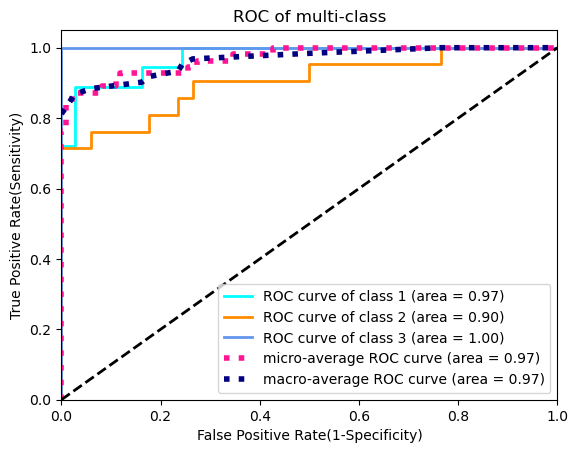

In [2229]:
draw()

### 浅谈ROC曲线和AUC值作为分类评价的合理性

在实际的数据集中经常会出现类不平衡现象，即负样本比正样本多很多或者少很多，而且测试数据中的正负样本的分布也可能随着时间变化。而当测试集中的正负样本的分布变化的时候，ROC曲线能够保持不变，因为TPR聚焦于正例，FPR聚焦于与负例，使其成为一个比较均衡的评估方法。